In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import svm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# from autosklearn.classification import AutoSklearnClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")

### Dataset

In [2]:
df=pd.read_csv("german_credit_data.csv",index_col=0)

In [3]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [5]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [6]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Exploratory Data Analysis

In [7]:
df['Age_Group'] = np.nan

df.loc[(df['Age'] > 18) & (df['Age'] <= 27), 'Age_Group'] = 'Young'
df.loc[(df['Age'] > 27) & (df['Age'] <= 35), 'Age_Group'] = 'Young Adults'
df.loc[(df['Age'] > 35) & (df['Age'] <= 55), 'Age_Group'] = 'Senior'
df.loc[df['Age'] > 55, 'Age_Group'] = 'Elder' 

<Axes: ylabel='Age'>

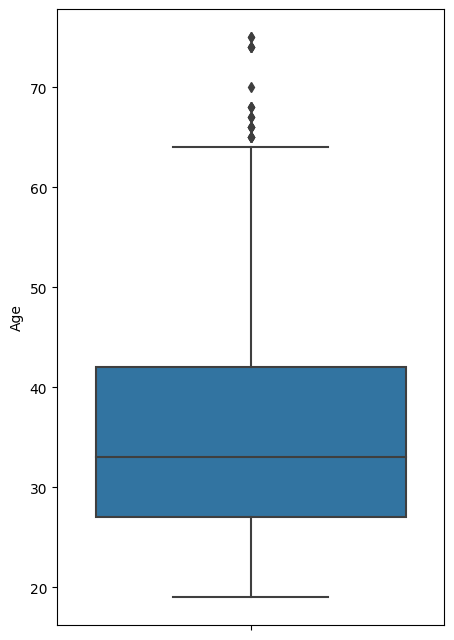

In [8]:
plt.figure(figsize=(5,8))
sns.boxplot(y ='Age', data=df)

Fig-1:The provided code snippet utilizes the matplotlib.pyplot library to generate a boxplot. The figure size is set to 5 inches in width and 8 inches in height. The boxplot represents the distribution of the 'Age' variable within the 'df' dataframe.

<Axes: xlabel='Risk', ylabel='count'>

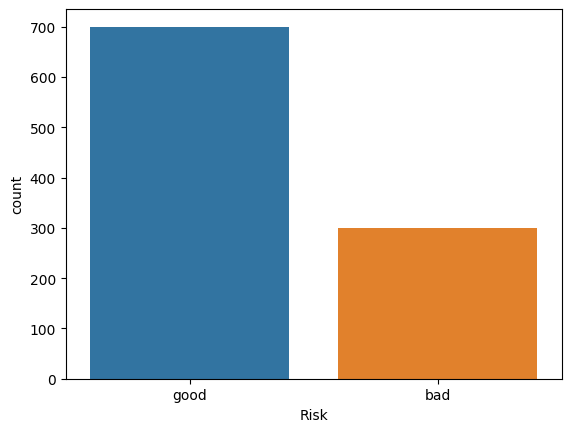

In [9]:
sns.countplot(x='Risk',data=df)

[Fig-2]: it visualizes the frequency or count of different categories within the 'Risk' column, helping to understand the distribution of risk values in the dataset. The count of each category is represented by the height of the corresponding bar on the plot.

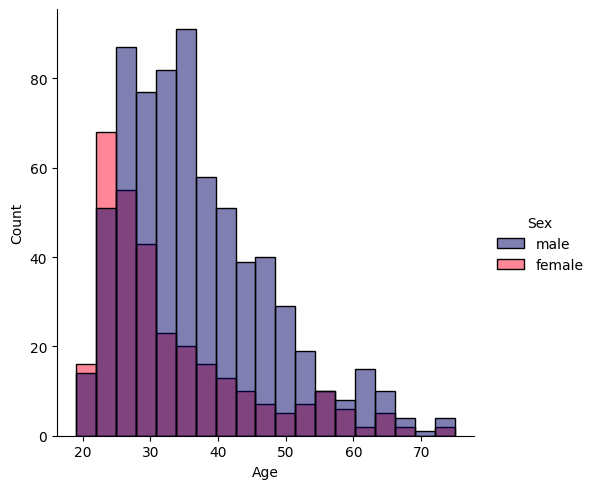

In [10]:
sns.displot(data=df, x='Age', kind="hist", hue='Sex', palette=['#000066',"#FF1133"])

[Fig-3]: this code generates a histogram of the distribution of ages, with bars colored differently for males and females, providing insights into the age distribution based on gender.

<Axes: xlabel='Credit amount', ylabel='Age_Group'>

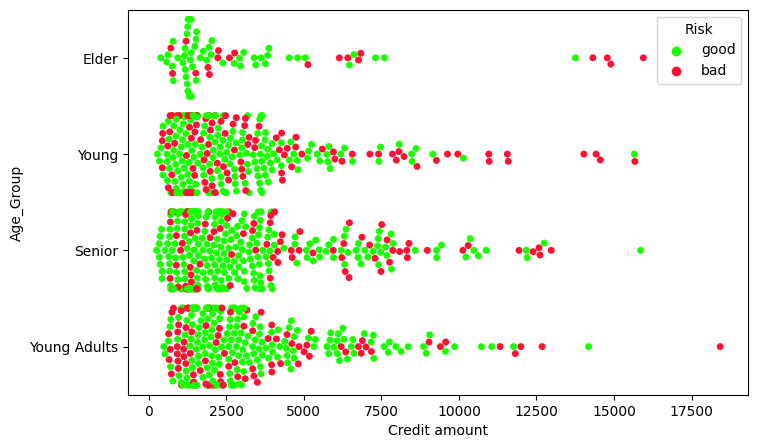

In [11]:
plt.figure(figsize=(8,5))
sns.swarmplot(y='Age_Group', x='Credit amount', data=df, hue='Risk', palette=['#19ff00',"#FF1133"])


[Fig-4]:This code creates a swarm plot to visualize how the distribution of 'Credit amount' varies across different age groups, with points colored based on the associated risk categories ('Good' or 'Bad').

<Axes: xlabel='Age_Group', ylabel='Credit amount'>

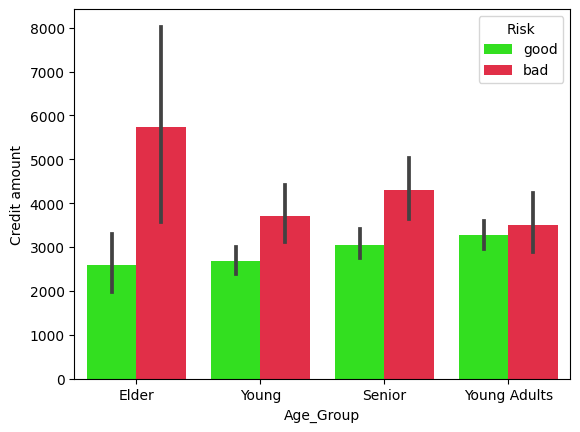

In [12]:
sns.barplot(x='Age_Group', y='Credit amount', data=df, hue='Risk', palette=['#19ff00',"#FF1133"])

[Fig-5]:This code creates a bar plot to compare the average 'Credit amount' across different age groups, with bars colored based on the associated risk categories ('Good' or 'Bad').

In [13]:
male_credit = df["Credit amount"].loc[df["Sex"] == "male"].values
female_credit = df["Credit amount"].loc[df["Sex"] == "female"].values
total_credit = df['Credit amount'].values

In [14]:
pd.crosstab(df['Purpose'], df['Risk'], normalize='columns')*100

Risk,bad,good
Purpose,,
business,11.333333,9.000000
car,35.333333,33.000000
domestic appliances,1.333333,1.142857
education,7.666667,5.142857
furniture/equipment,19.333333,17.571429
radio/TV,20.666667,31.142857
repairs,2.666667,2.000000
vacation/others,1.666667,1.000000


<Axes: xlabel='count', ylabel='Purpose'>

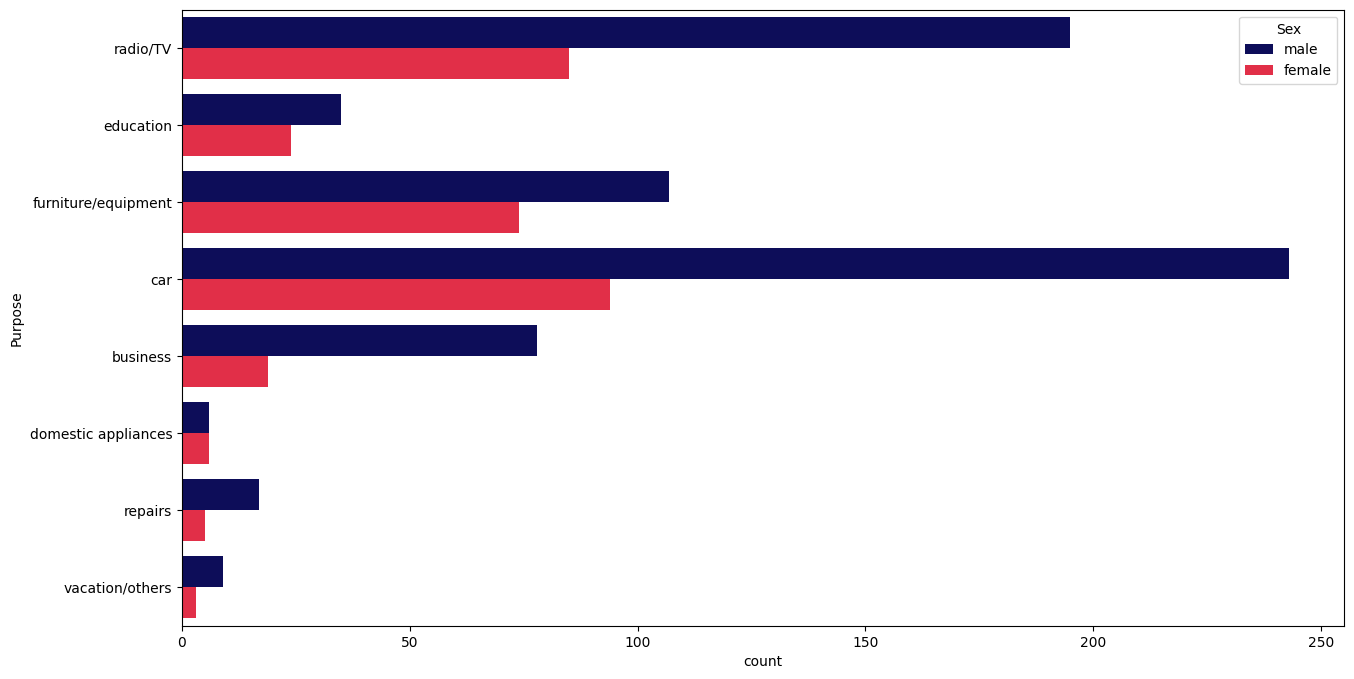

In [15]:
plt.figure(figsize=(15,8))
sns.countplot(y='Purpose', hue='Sex', data=df, palette=['#000066',"#FF1133"])

[Fig-6]: This code creates a horizontal count plot to show the distribution of purposes for which loans are taken, with bars colored based on the associated gender categories ('Male' or 'Female').

In [16]:
pd.crosstab(df['Job'], df['Risk'], normalize='columns')*100

Risk,bad,good
Job,,
0,2.333333,2.142857
1,18.666667,20.571429
2,62.000000,63.428571
3,17.000000,13.857143


In [17]:
pd.crosstab(df['Job'], df['Housing'], normalize=True)*100


Housing,free,own,rent
Job,,,
0,0.4,1.3,0.5
1,0.8,15.4,3.8
2,6.3,45.2,11.5
3,3.3,9.4,2.1


In [18]:
pd.crosstab(df['Risk'], df['Saving accounts'])

Saving accounts,little,moderate,quite rich,rich
Risk,,,,
bad,217,34,11,6
good,386,69,52,42


In [19]:
df['Purpose'].value_counts()

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

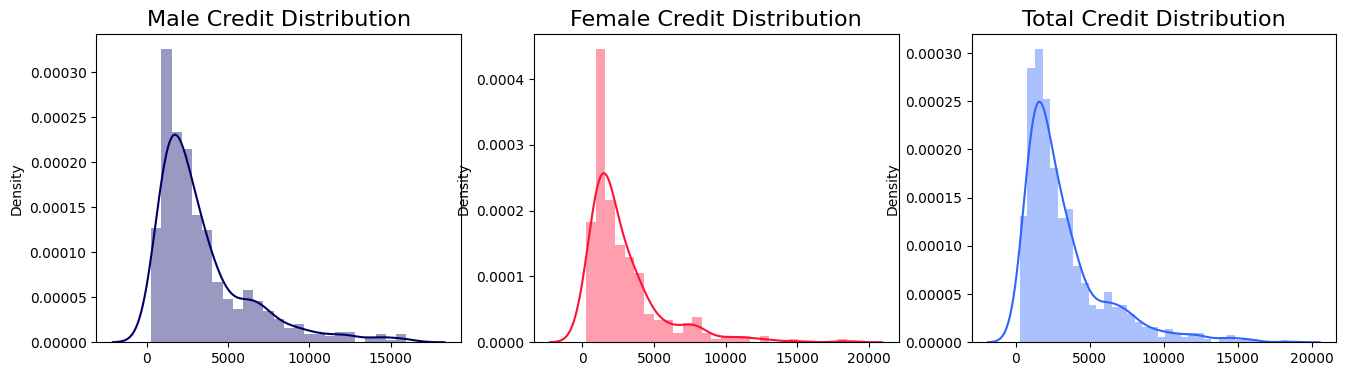

In [20]:
male_credit = df["Credit amount"].loc[df["Sex"] == "male"].values
female_credit = df["Credit amount"].loc[df["Sex"] == "female"].values
total_credit = df['Credit amount'].values

fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.distplot(male_credit, ax=ax[0], color="#000066")
ax[0].set_title("Male Credit Distribution", fontsize=16)
sns.distplot(female_credit, ax=ax[1], color="#FF1133")
ax[1].set_title("Female Credit Distribution", fontsize=16)
sns.distplot(total_credit, ax=ax[2], color="#2E64FE")
ax[2].set_title("Total Credit Distribution", fontsize=16)
plt.show()

[Fig-7]:this code creates a visualization with three distribution plots, each representing the credit distribution for males, females, and the total population, respectively. The different colors and titles help distinguish and label each subplot.







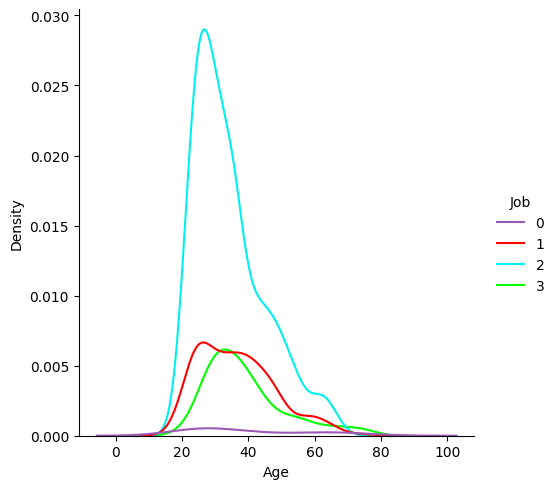

In [21]:
sns.displot(x='Age', hue='Job', data=df, kind='kde', palette=["#9b59b6", "#ff0000", "#00f0f0", "#00ff00"])

[Fig-8]:this code generates a KDE plot for the distribution of values in the 'Job' column, with different colors representing different job categories. The KDE plot provides insights into the probability density of different job levels in the dataset.

<Axes: >

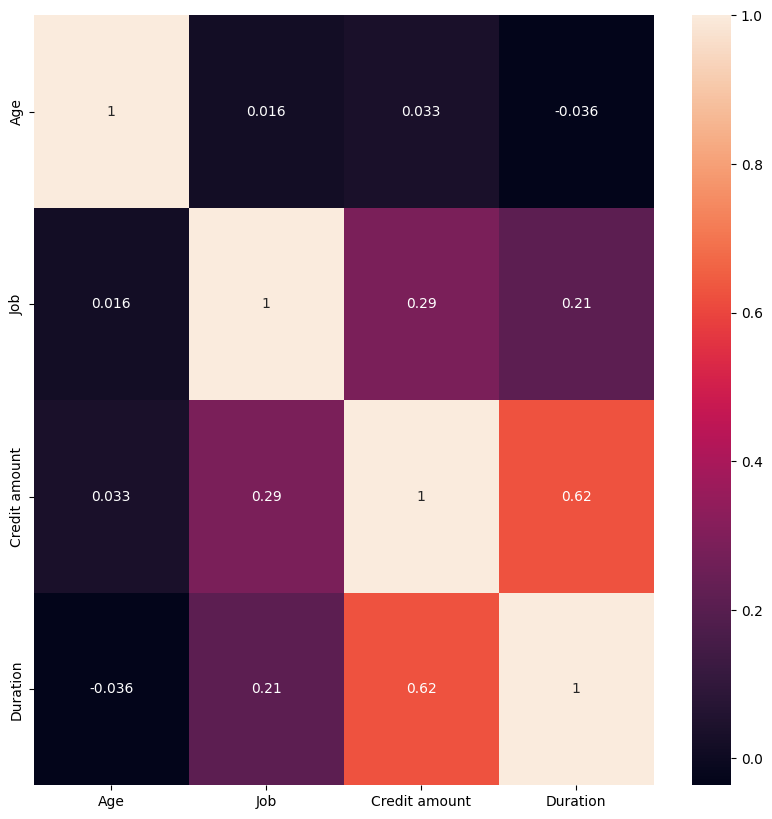

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

[Fig-9]:This code creates a heatmap to visually represent the correlation between numerical variables in the dataset, providing insights into how strongly pairs of variables are correlated. The annotations help in identifying the exact correlation coefficients.

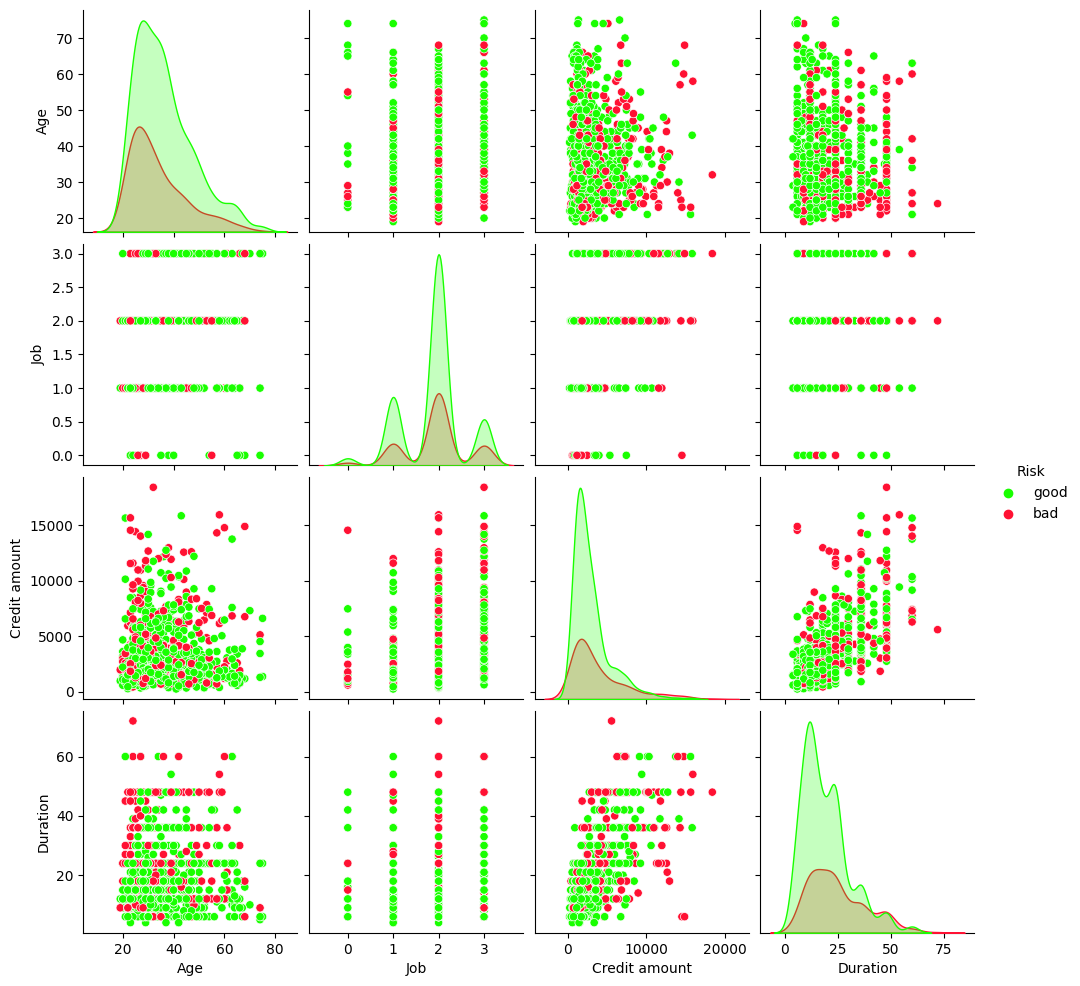

In [23]:
sns.pairplot(df, hue='Risk', palette=['#19ff00',"#FF1133"])

[Fig-10]: This code creates a heatmap to visually represent the correlation between numerical variables in the dataset, providing insights into how strongly pairs of variables are correlated. The annotations help in identifying the exact correlation coefficients.

In [24]:
pd.crosstab(df['Risk'], df['Saving accounts'])

Saving accounts,little,moderate,quite rich,rich
Risk,,,,
bad,217,34,11,6
good,386,69,52,42


<Axes: xlabel='Duration', ylabel='Credit amount'>

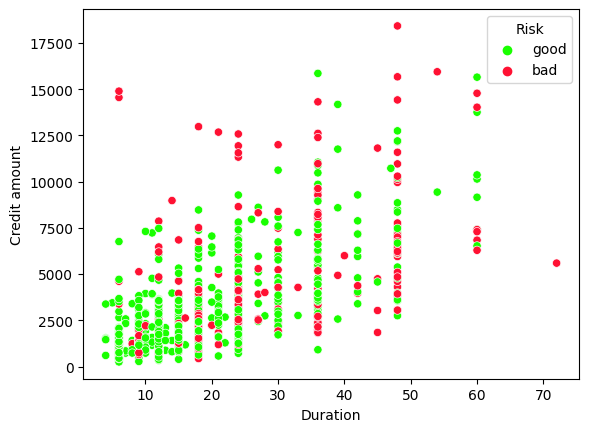

In [25]:
sns.scatterplot(x='Duration', y='Credit amount', data=df, hue='Risk', palette=['#19ff00',"#FF1133"])


[Fig-11]:this code creates a scatter plot to visualize the relationship between the 'Duration' and 'Credit amount' columns, with points colored based on the associated risk categories ('Good' or 'Bad'). It helps to explore the distribution and patterns of credit amounts and durations in the dataset.







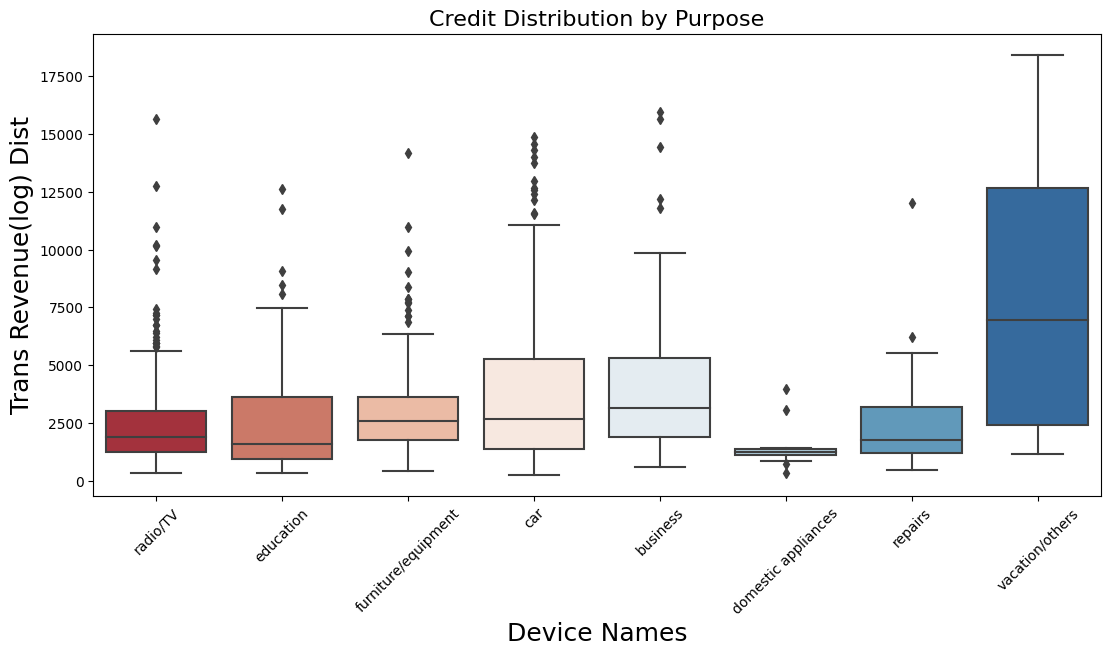

In [26]:
plt.figure(figsize=(13,6)) #figure size
g = sns.boxplot(x='Purpose', y='Credit amount', 
                   data=df, palette="RdBu")


g.set_title("Credit Distribution by Purpose", fontsize=16)
g.set_xticklabels(g.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g.set_xlabel('Device Names', fontsize=18) # Xlabel
g.set_ylabel('Trans Revenue(log) Dist', fontsize=18) 
plt.show()

[Fig-12]:This code creates a boxplot to visualize the distribution of credit amounts across different purposes, with the boxplot color palette set to "RdBu". It also includes axis labels, a title, and rotated x-axis labels for better presentation.







### Feature Engineering

In [27]:
df[df.duplicated(keep=False)]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group


In [28]:
z = np.abs(stats.zscore(df['Credit amount']))
threshold = 4

print(np.where(z > threshold)[0])

[ 95 374 637 818 887 915 917]


In [29]:
df.iloc[np.where(z > threshold)[0]]

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Age_Group
95,58,male,2,rent,little,moderate,15945,54,business,bad,Elder
374,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad,Elder
637,21,male,2,own,little,NaN,15653,60,radio/TV,good,Young
818,43,male,3,own,little,little,15857,36,vacation/others,good,Senior
887,23,male,2,own,little,moderate,15672,48,business,bad,Young
915,32,female,3,own,little,moderate,18424,48,vacation/others,bad,Young Adults
917,68,male,3,own,little,little,14896,6,car,bad,Elder


In [30]:
df.drop(np.where(z > threshold)[0], axis=0, inplace=True)

In [31]:
z = np.abs(stats.zscore(df['Duration']))
print(np.where(z > threshold)[0])

[674]


In [32]:
df.drop(np.where(z > threshold)[0], axis=0, inplace=True)

In [33]:
df.drop('Checking account', axis=1, inplace=True)

In [34]:
df.dropna(axis=0, inplace=True)

In [35]:
df.head(809)

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk,Age_Group
1,22,female,2,own,little,5951,48,radio/TV,bad,Young
2,49,male,1,own,little,2096,12,education,good,Senior
3,45,male,2,free,little,7882,42,furniture/equipment,good,Senior
4,53,male,2,free,little,4870,24,car,bad,Senior
6,53,male,2,own,quite rich,2835,24,furniture/equipment,good,Senior
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,1736,12,furniture/equipment,good,Young Adults
996,40,male,3,own,little,3857,30,car,good,Senior
997,38,male,2,own,little,804,12,radio/TV,good,Senior
998,23,male,2,free,little,1845,45,radio/TV,bad,Young


## Preprocess

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 1 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              809 non-null    int64 
 1   Sex              809 non-null    object
 2   Job              809 non-null    int64 
 3   Housing          809 non-null    object
 4   Saving accounts  809 non-null    object
 5   Credit amount    809 non-null    int64 
 6   Duration         809 non-null    int64 
 7   Purpose          809 non-null    object
 8   Risk             809 non-null    object
 9   Age_Group        809 non-null    object
dtypes: int64(4), object(6)
memory usage: 69.5+ KB


In [37]:
df['Sex_01'] = np.nan

df.loc[df['Sex'] == 'male', 'Sex_01'] = 0 
df.loc[df['Sex'] == 'female', 'Sex_01'] = 1

In [38]:
df['Housing_01']= np.nan

df.loc[df['Housing'] == 'own', 'Housing_01'] = 1 
df.loc[df['Housing'] == 'free', 'Housing_01'] = 2
df.loc[df['Housing'] == 'rent', 'Housing_01'] = 3

In [39]:
df['Savings']= np.nan

df.loc[df['Saving accounts'] == 'rich', 'Savings'] = 4
df.loc[df['Saving accounts'] == 'quite rich', 'Savings'] = 3
df.loc[df['Saving accounts'] == 'moderate', 'Savings'] = 2
df.loc[df['Saving accounts'] == 'little', 'Savings'] = 1

In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['purpose_x'] = label_encoder.fit_transform(df['Purpose'])


In [41]:
df['Risk_01'] = np.nan

df.loc[df['Risk'] == 'good', 'Risk_01'] = 0 
df.loc[df['Risk'] == 'bad', 'Risk_01'] = 1

In [42]:
df['Sex_01'] = df['Sex_01'].astype('int')
df['Housing_01'] = df['Housing_01'].astype('int')
df['Savings'] = df['Savings'].astype('int')
df['Risk_01'] = df['Risk_01'].astype('int')

In [43]:
df.drop('Risk', axis=1, inplace=True)
df.drop('Sex', axis=1, inplace=True)
df.drop('Housing', axis=1, inplace=True)
df.drop('Saving accounts', axis=1, inplace=True)
df.drop('Purpose', axis=1, inplace=True)
df.drop('Age_Group', axis=1, inplace=True)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 809 entries, 1 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            809 non-null    int64
 1   Job            809 non-null    int64
 2   Credit amount  809 non-null    int64
 3   Duration       809 non-null    int64
 4   Sex_01         809 non-null    int32
 5   Housing_01     809 non-null    int32
 6   Savings        809 non-null    int32
 7   purpose_x      809 non-null    int32
 8   Risk_01        809 non-null    int32
dtypes: int32(5), int64(4)
memory usage: 47.4 KB


## Modelling

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Risk_01',axis=1), df['Risk_01'], test_size=0.2, random_state=42, stratify=df['Risk_01'])

In [46]:
print(df.shape,X_train.shape,X_test.shape)

(809, 9) (647, 8) (162, 8)


In [47]:
ss=StandardScaler()

In [48]:
ss.fit(X_train)

StandardScaler()

In [49]:
X_train=ss.transform(X_train)
X_test=ss.transform(X_test)

In [50]:
print(X_train)

[[ 0.88799318  0.14187371 -0.3061932  ... -0.60759522 -0.52843848
  -0.96185386]
 [-0.69959795  0.14187371 -0.2417358  ... -0.60759522  0.61503877
  -0.96185386]
 [-0.0822014   0.14187371  0.56035597 ... -0.60759522 -0.52843848
   1.06524532]
 ...
 [-0.69959795  1.6717452  -0.66111175 ...  0.6523859  -0.52843848
  -0.96185386]
 [-0.87599696  0.14187371 -0.72718059 ... -0.60759522 -0.52843848
  -1.46862866]
 [ 2.65198333  0.14187371 -1.00394455 ... -0.60759522 -0.52843848
  -0.96185386]]


In [51]:
print(X_test)

[[ 2.47558431  0.14187371  1.51996551 ... -0.60759522 -0.52843848
  -1.46862866]
 [ 0.62339466  0.14187371 -1.06920767 ...  1.91236702  2.90199326
   1.06524532]
 [ 0.09419762  0.14187371 -0.72556915 ... -0.60759522  1.75851601
  -0.45507907]
 ...
 [ 0.09419762 -1.38799778  0.47454706 ... -0.60759522 -0.52843848
  -1.46862866]
 [-0.34679992  0.14187371 -0.12772677 ... -0.60759522 -0.52843848
   0.55847053]
 [ 1.0643922  -1.38799778 -0.70381478 ... -0.60759522  1.75851601
   1.06524532]]


In [52]:
model=svm.SVC(kernel = 'linear')

In [53]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [54]:
X_train_pred=model.predict(X_train)
train_data_acc=accuracy_score(y_train,X_train_pred)

In [55]:
print("acc of training data :",train_data_acc)

acc of training data : 0.7047913446676971


In [56]:
X_test_pred=model.predict(X_test)
test_data_acc=accuracy_score(y_test,X_test_pred)

In [57]:
print("acc of testing data :",test_data_acc)

acc of testing data : 0.691358024691358
